# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

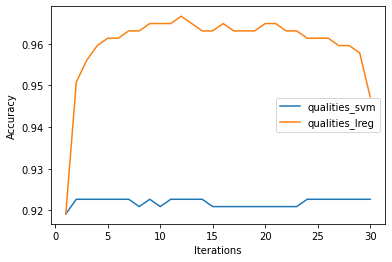

In [38]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

qualities_svm = []
qualities_lreg = []
fcount = [i for i in range(1, 31)]
not_used = [i for i in range(30)]
X_new = np.array([[] for i in range(569)])

for fc in range(1, 31):
    best_acc = 0
    to_add = -1
    for i in not_used:
        X_cur = X_new.copy()
        X_cur = np.append(X_cur, X[:, i].reshape(-1, 1), 1)
        #print(X_cur)
        lreg = LogisticRegression()
        lreg.fit(X_cur, y)
        if lreg.score(X_cur, y) > best_acc:
            best_acc = lreg.score(X_cur, y)
            to_add = i
    not_used.remove(to_add)
    X_new = np.append(X_new, X[:, to_add].reshape(-1, 1), 1)
    qualities_lreg.append(best_acc)
not_used = [i for i in range(30)]
X_new = np.array([[0] for i in range(569)])
for fc in range(1, 31):
    best_acc = 0
    to_add = -1
    for i in not_used:
        X_cur = X_new.copy()
        X_cur = np.append(X_cur, X[:, i].reshape(-1, 1), 1)
        svc = svm.SVC()
        svc.fit(X_cur, y)
        if svc.score(X_cur, y) > best_acc:
            best_acc = svc.score(X_cur, y)
            to_add = i
    not_used.remove(to_add)
    X_new = np.append(X_new, X[:, to_add].reshape(-1, 1), 1)
    qualities_svm.append(best_acc)
    
plt.plot(fcount, qualities_svm, label='qualities_svm')

plt.plot(fcount, qualities_lreg, label='qualities_lreg')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Backward elimination (2pts)

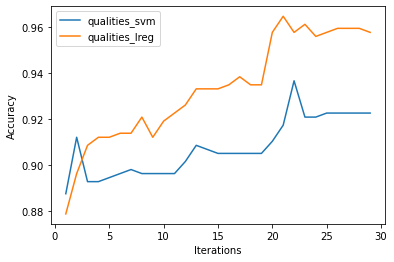

In [47]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

qualities_svm = []
qualities_lreg = []
fcount = [i for i in range(1, 30)]

X_new = X

for fc in range(1, 30):
    best_acc = 0
    to_add = -1
    for i in range(X_new.shape[1]):
        X_cur = X_new.copy()
        X_cur = np.delete(X_cur, i, 1)
        #print(X_cur)
        lreg = LogisticRegression()
        lreg.fit(X_cur, y)
        if lreg.score(X_cur, y) > best_acc:
            best_acc = lreg.score(X_cur, y)
            to_add = i
    X_new = np.delete(X_new, i, 1)
    qualities_lreg.append(best_acc)

X_new = X
for fc in range(1, 30):
    best_acc = 0
    to_add = -1
    for i in range(X_new.shape[1]):
        X_cur = X_new.copy()
        X_cur = np.delete(X_cur, i, 1)
        #print(X_cur)
        svc = svm.SVC()
        svc.fit(X_cur, y)
        if svc.score(X_cur, y) > best_acc:
            best_acc = svc.score(X_cur, y)
            to_add = i
    X_new = np.delete(X_new, i, 1)
    qualities_svm.append(best_acc)
    
plt.plot(fcount, qualities_svm[::-1], label='qualities_svm')

plt.plot(fcount, qualities_lreg[::-1], label='qualities_lreg')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

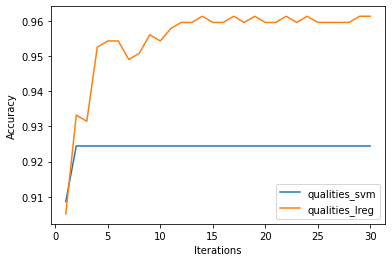

In [49]:
plt.cla()
qualities_svm = []
qualities_lreg = []
fcount = [i for i in range(1, 31)]
for i in fcount:
    pca = decomposition.PCA(n_components=i)
    pca.fit(X)
    X_new = pca.transform(X)
    lreg = LogisticRegression()
    lreg.fit(X_new, y)
    svc = svm.SVC()
    svc.fit(X_new, y)
    
    qualities_lreg.append(lreg.score(X_new, y))
    qualities_svm.append(svc.score(X_new, y))

    
plt.plot(fcount, qualities_svm, label='qualities_svm')

plt.plot(fcount, qualities_lreg, label='qualities_lreg')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#  Выводы (1pts)

В нашем случае больше фичей = лучше, но можно в самом начале заметить, как скор падает, когда у нас >=28 фичей